<a href="https://colab.research.google.com/github/Laurahg22/Trabajo-analitica-RH/blob/main/c_exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Cargar paquetes siempre al inicio
import pandas as pd ### para manejo de datos
import sqlite3 as sql #### para bases de datos sql
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
import seaborn as sns
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.tree import export_text ## para exportar reglas del árbol
import sys ## saber ruta de la que carga paquetes
import matplotlib.pyplot as plt #para visualización

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###Ruta directorio qué tiene paquetes
sys.path
sys.path.append('/content/drive/MyDrive/Trabajo-analitica-RH') ## este comanda agrega una ruta

In [ ]:
import a_funciones as funciones ### archivo de funciones propias

In [ ]:
# Configurar la opción para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)

In [ ]:
df2015=pd.read_csv('https://raw.githubusercontent.com/Laurahg22/Trabajo-analitica-RH/main/data/df_2015')
df2015

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,2015-12-31 00:00:00,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2015-12-31 00:00:00,3.0,2.0,4.0,2,4,Yes,2016-10-15 00:00:00,Resignation,Others
2,2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2015-12-31 00:00:00,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2015-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,2015-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,2015-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
4406,4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2015-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4407,4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,2015-12-31 00:00:00,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN
4408,4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2015-12-31 00:00:00,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN


In [ ]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [ ]:
# Identificar si hay datos duplicados
display(df2015[df2015.duplicated(keep='last')])
display(df2015[df2015.duplicated(keep='first')])

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason


In [ ]:
# eliminar variable index
df2015 = df2015.drop(['index', 'EmployeeID', 'InfoDate', 'retirementDate'], axis=1)

In [ ]:
# llenar nulos de la variable respuesta
condicion = (df2015['retirementType'] == 'fired') | (pd.isnull(df2015['retirementType']))
df2015.loc[condicion, 'Attrition'] = 'No'

In [ ]:
def imp_datos (df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df

In [ ]:
# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
df2015 = imp_datos(df2015, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [ ]:
df2015.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction       0
JobSatisfaction               0
WorkLifeBalance               0
JobInvolvement                0
PerformanceRating             0
Attrition                     0
retirementType             3760
resignationReason          3825
dtype: int64

#Exploración de variables categóricas

In [ ]:
# Seleccionar variables que analizaremos como categoricas
var_cat = pd.DataFrame(df2015[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole',
                               'MaritalStatus','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance',
                               'JobInvolvement','PerformanceRating']].astype(object))
var_cat.dtypes

BusinessTravel             object
Department                 object
Education                  object
EducationField             object
Gender                     object
JobLevel                   object
JobRole                    object
MaritalStatus              object
StockOptionLevel           object
EnvironmentSatisfaction    object
JobSatisfaction            object
WorkLifeBalance            object
JobInvolvement             object
PerformanceRating          object
dtype: object

In [ ]:
#resumen de las variables categoricas para observar el balanceo de las categoricas
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in var_cat.columns if var_cat[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(var_cat, col, plot=False)

                   BusinessTravel      Ratio
Travel_Rarely                3129  70.952381
Travel_Frequently             831  18.843537
Non-Travel                    450  10.204082
##########################################
                        Department      Ratio
Research & Development        2883  65.374150
Sales                         1338  30.340136
Human Resources                189   4.285714
##########################################
   Education      Ratio
3       1716  38.911565
4       1194  27.074830
2        846  19.183673
1        510  11.564626
5        144   3.265306
##########################################
                  EducationField      Ratio
Life Sciences               1818  41.224490
Medical                     1392  31.564626
Marketing                    477  10.816327
Technical Degree             396   8.979592
Other                        246   5.578231
Human Resources               81   1.836735
##########################################
        Gend

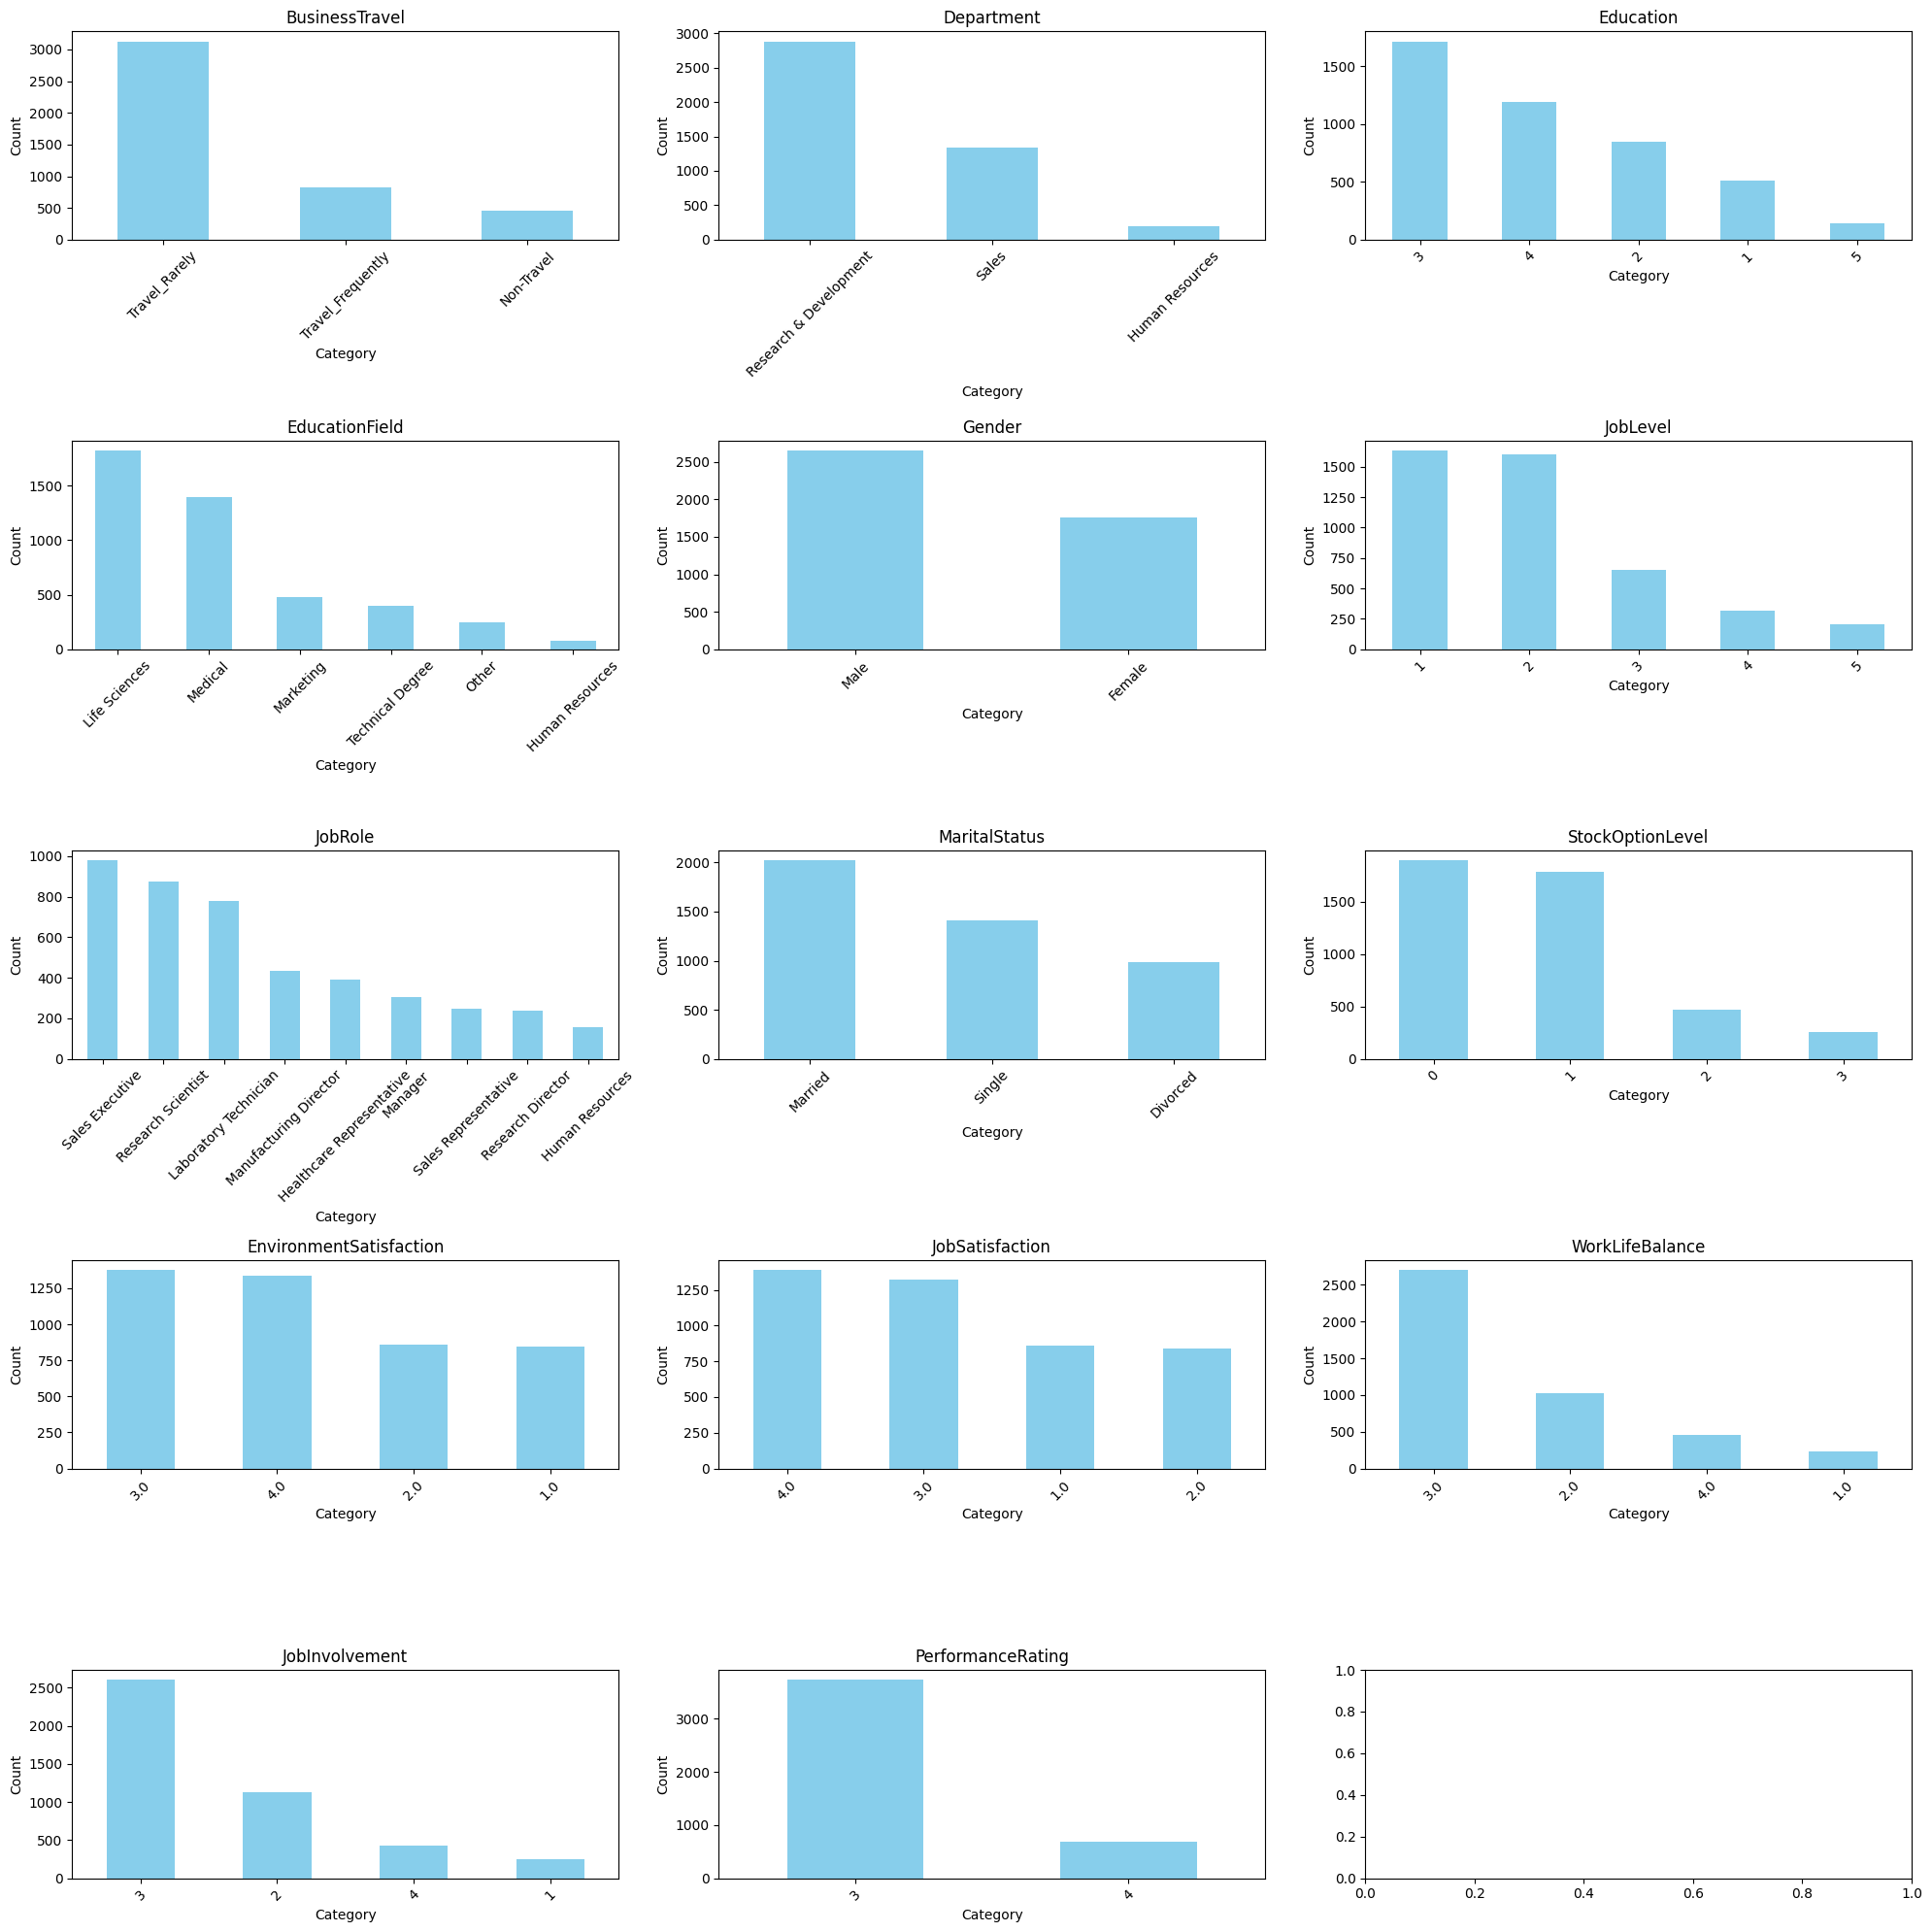

In [ ]:
# Definir el número de filas y columnas para los subplots
num_rows = 5
num_cols = 3

# Crear una figura y ejes de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Aplanar los ejes de los subplots para facilitar el bucle
axes = axes.flatten()

# Iterar sobre las variables categóricas y trazar gráficos de barras apiladas
for i, col in enumerate(var_cat.columns):
    ax = axes[i]
    var_cat[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

##Exploración de variables numéricas

In [ ]:
var_num = pd.DataFrame(df2015[['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
                               'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']].astype(float))
var_num.dtypes

Age                        float64
DistanceFromHome           float64
MonthlyIncome              float64
NumCompaniesWorked         float64
PercentSalaryHike          float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromotion    float64
YearsWithCurrManager       float64
dtype: object

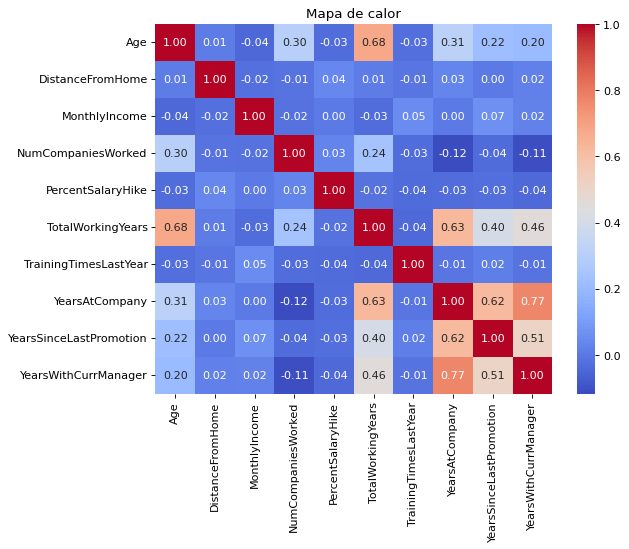

In [ ]:
# Calcula la matriz de correlación.
matriz_correlacion = var_num.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor")
plt.show()

Comentar el mapa de calor

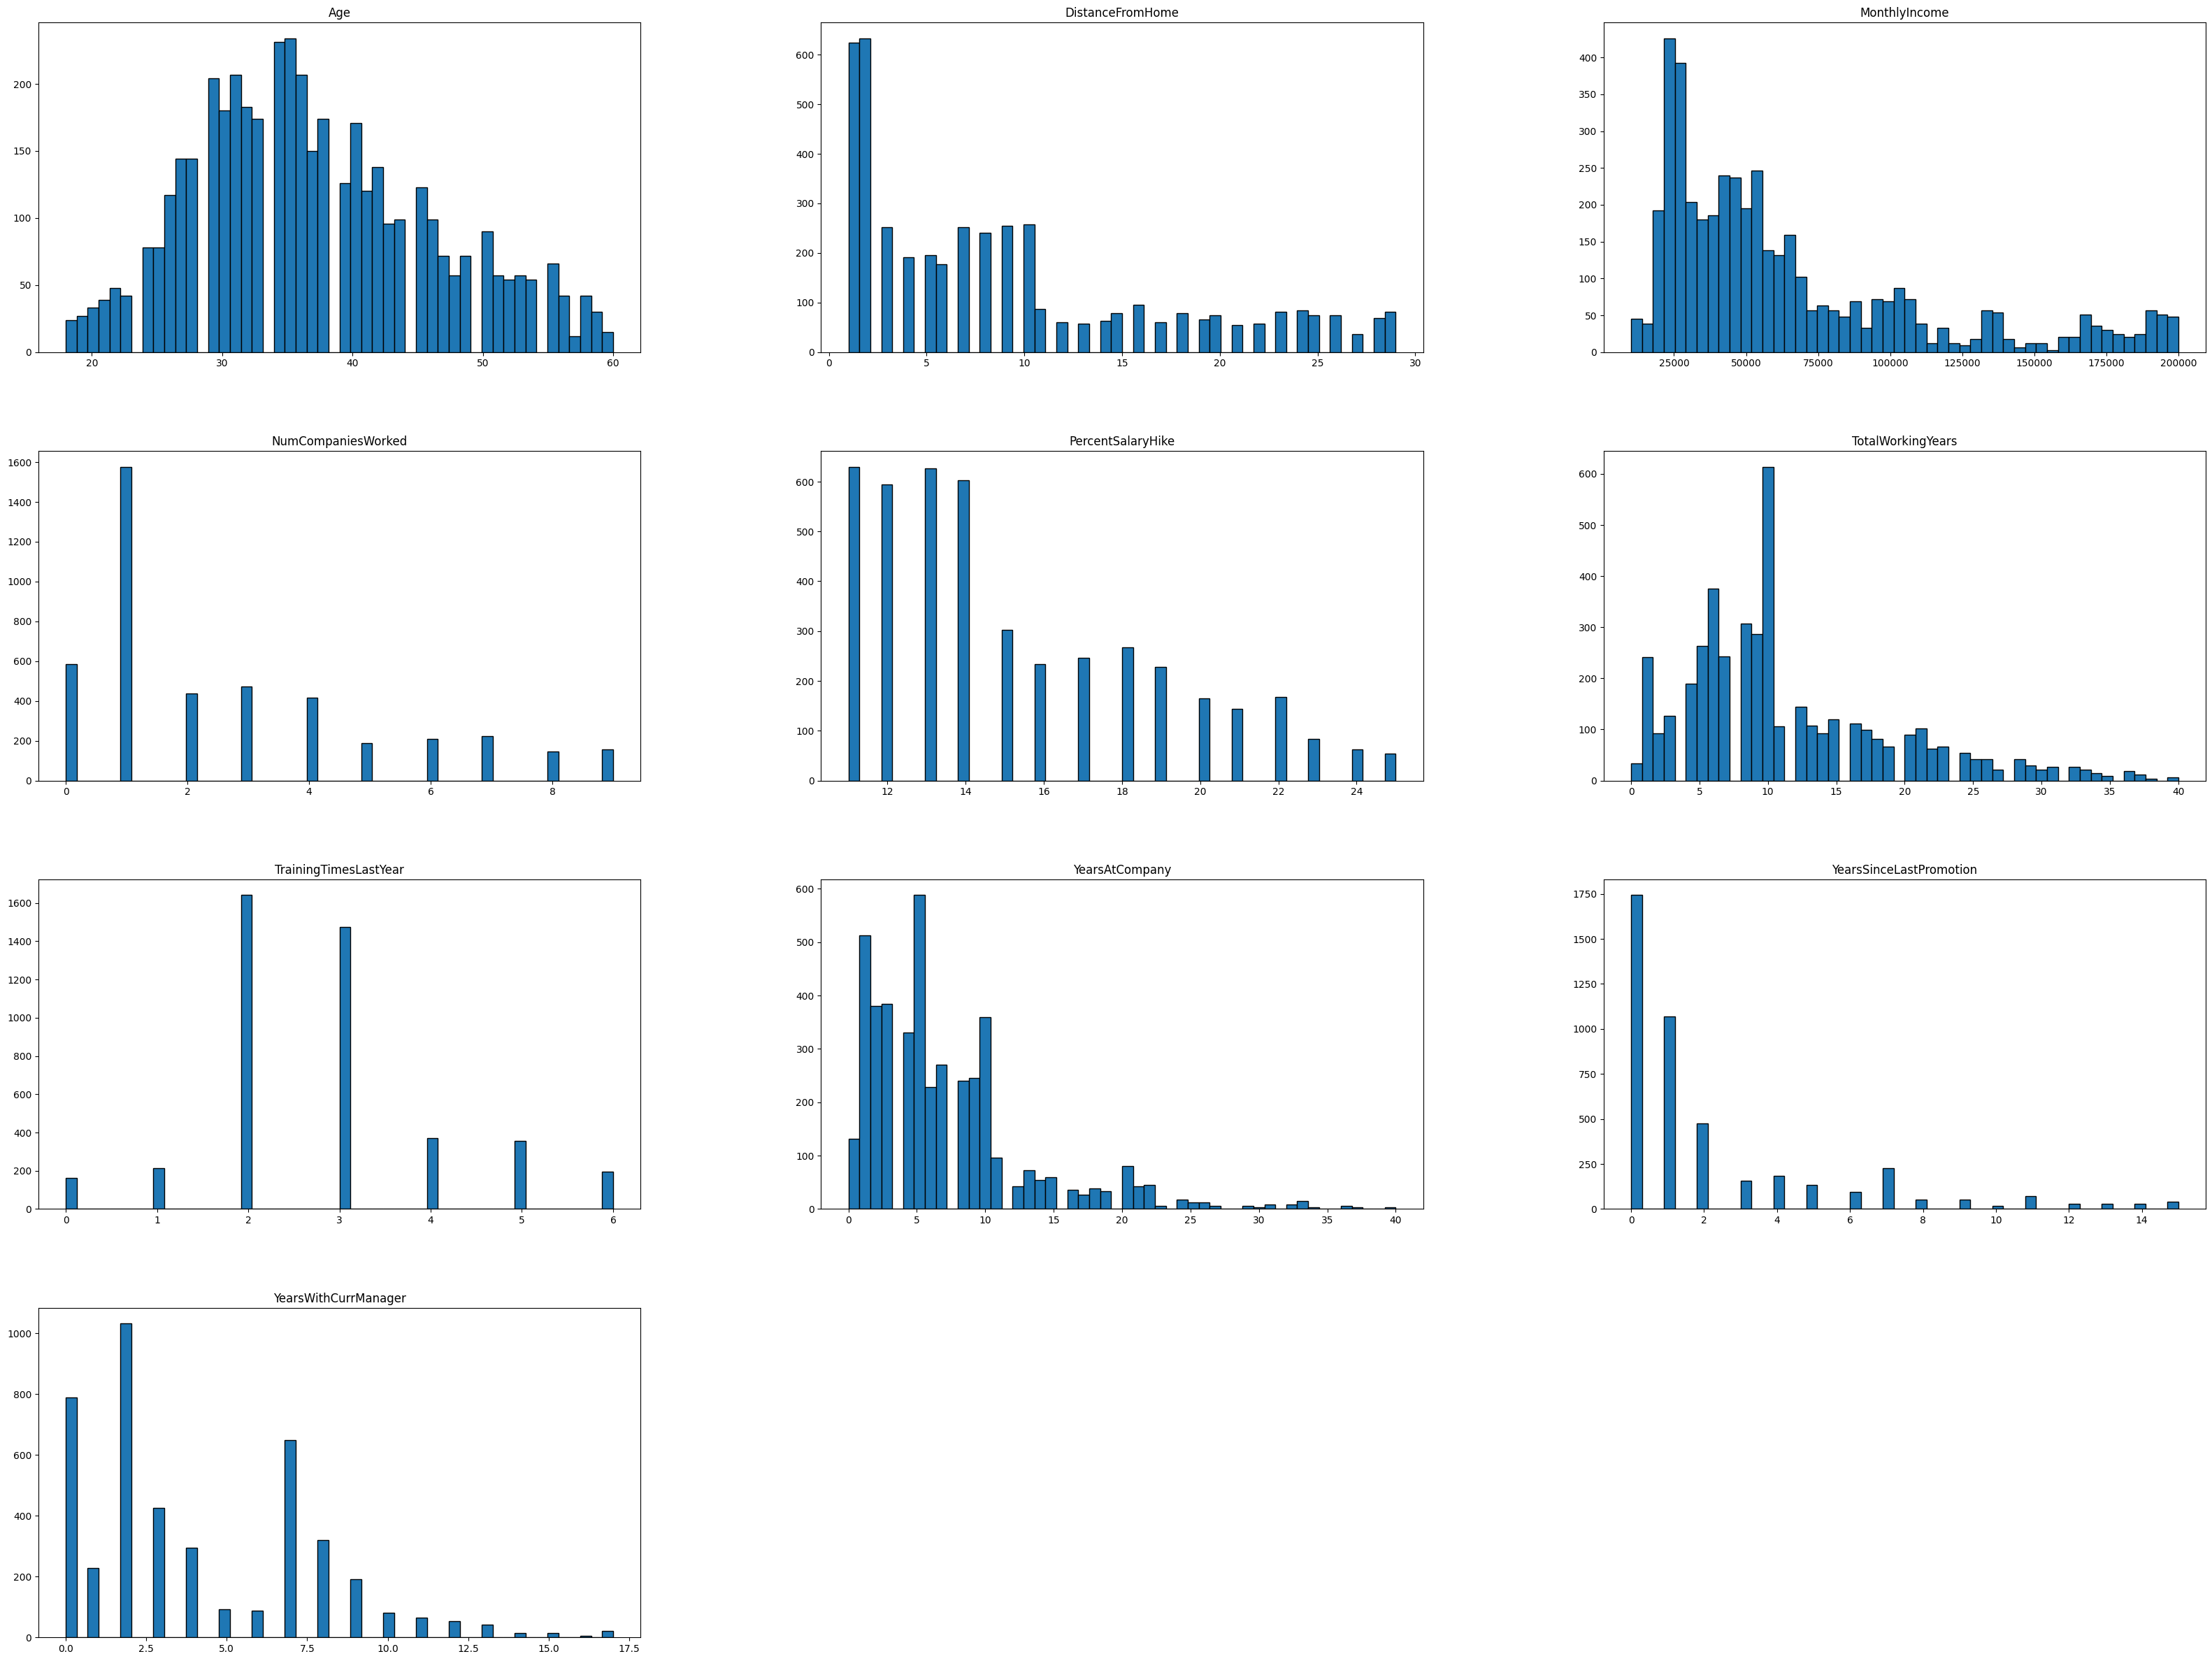

In [ ]:
####explorar variables numéricas con histograma
fig=var_num.hist(bins=50, figsize=(40,30),grid=False,ec='black')
plt.show()

Exploracion de variable respuesta

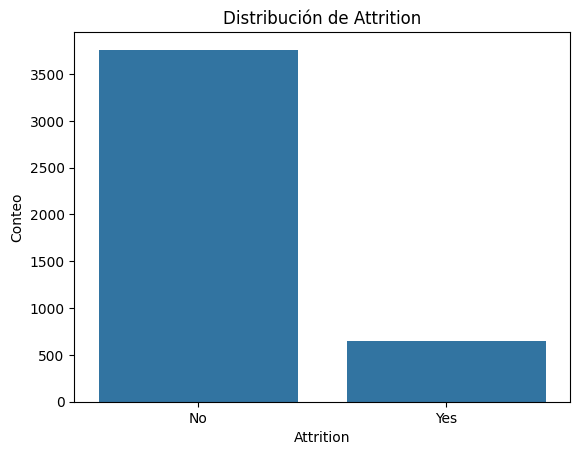

In [ ]:
# Crear un gráfico de barras utilizando Seaborn
sns.countplot(x='Attrition', data=df2015 )  # Crear gráfico
plt.title('Distribución de Attrition')  # Título
plt.xlabel('Attrition')  # Etiqueta del eje x
plt.ylabel('Conteo')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

Convertir variables a dummies

In [ ]:
df_dummies = df2015.copy()

In [ ]:
# Identificar las columnas categóricas
categorical_columns = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in categorical_columns:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']
Categorías en "Attrition": ['No' 'Yes']
Categorías en "retirementType": [nan 'Resignation' 'Fired']
Categorías en "resignationReason": [nan 'Others' 'Stress' 'Salary']


In [ ]:
df_dummies = pd.get_dummies(df_dummies[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']],
                                prefix=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
df_dummies

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4407,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4408,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Eliminar las columnas originales del DataFrame original
df2015 = df2015.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

# Concatenar las variables dummies con el DataFrame original
df2015 = pd.concat([df2015, df_dummies], axis=1)

# Ahora df2015 contiene las variables dummies junto con las columnas originales

In [ ]:
df2015

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementType,resignationReason,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,No,NaN,NaN,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,Yes,Resignation,Others,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,No,NaN,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,No,NaN,NaN,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,No,NaN,NaN,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3,No,NaN,NaN,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3,No,NaN,NaN,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4,No,NaN,NaN,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,23980,0.0,14,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3,No,NaN,NaN,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df2015['Attrition'] = df2015['Attrition'].replace({'No': 0, 'Yes': 1})
df2015['Attrition'].value_counts() # se aplica está función para ver la frecuencia de datos

0    3760
1     650
Name: Attrition, dtype: int64

In [ ]:
df2015 = df2015.drop(['retirementType','resignationReason'], axis=1)

In [ ]:
df2015

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4407,25,25,2,2,37020,0.0,20,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4408,42,18,2,1,23980,0.0,14,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Especificar la ruta de la carpeta donde deseas guardar el archivo CSV en Google Drive
carpeta_destino = '/content/drive/MyDrive/Trabajo-analitica-RH/data/'

# Guardar el DataFrame como un archivo CSV en la carpeta de destino
df2015.to_csv(carpeta_destino + 'df2015.csv', index=False)